In [29]:
import pandas as pd
import urllib as ul
import numpy as np
from Bio import Entrez

In [2]:
data = pd.read_csv('SFARI-Gene_genes_11-07-2022release_11-10-2022export.csv', header=0, sep=',')

In [3]:
data

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,2.0,0,NaN,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",2.0,0,NaN,9
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,2.0,0,NaN,4
4,9,ABL2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",ENSG00000143322,1,"Rare Single Gene Mutation, Functional",3.0,0,NaN,10
...,...,...,...,...,...,...,...,...,...,...
1090,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,3
1091,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,15
1092,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,2
1093,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,NaN,5


In [9]:
data_gs_withNA = pd.DataFrame(data.value_counts(['gene-score'], dropna=False),columns=['gene_number'])
data_gs_withNA

,gene_number
gene-score,
2.0,695
1.0,214
NaN,95
3.0,91


In [10]:
dd = pd.DataFrame(data.value_counts(['gene-score']),columns=['gene_number'])
dd.index = [i[0] for i in dd.index]
dd

,gene_number
2.0,695
1.0,214
3.0,91


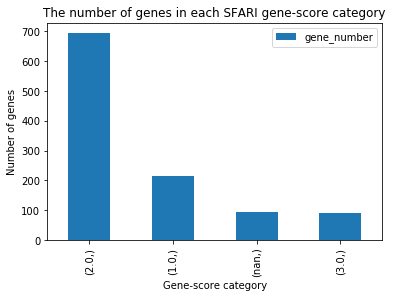

In [13]:
data_gs_withNA.plot.bar(xlabel='Gene-score category',
    ylabel='Number of genes',
    title='The number of genes in each SFARI gene-score category',
    stacked=True).legend(loc='best');

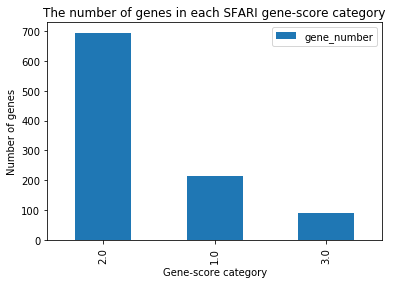

In [14]:
dd.plot.bar(xlabel='Gene-score category',
    ylabel='Number of genes',
    title='The number of genes in each SFARI gene-score category',
    stacked=True).legend(loc='best');

In [28]:
p1t2 = data.sort_values(by=['number-of-reports'], ascending=False)
p1t2.head(5)

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
870,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,74.85,120
563,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,NaN,107
644,9,NRXN1,neurexin 1,ENSG00000179915,2,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,0,143.75,100
846,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic, Functional",1.0,0,109.30,96
845,9,SCN1A,"sodium channel, voltage-gated, type I, alpha s...",ENSG00000144285,2,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,NaN,84


**Part 1, task 3**

In [31]:
#search 1, SHANK3 AND Autism
handle = Entrez.egquery(term='SHANK3 AND Autism')
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('SHANK3 AND Autism')
        print(row["Count"]+' papers\n')

SHANK3 AND Autism
493 papers



In [32]:
#search 2, MECP2 AND Autism
handle = Entrez.egquery(term='MECP2 AND Autism')
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('MECP2 AND Autism')
        print(row["Count"]+' papers\n')

        
#search 3, NRXN1 AND Autism
handle = Entrez.egquery(term='NRXN1 AND Autism')
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('NRXN1 AND Autism')
        print(row["Count"]+' papers\n')       

        
#search 4, SCN2A AND Autism
handle = Entrez.egquery(term='SCN2A AND Autism')
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('SCN2A AND Autism')
        print(row["Count"]+' papers\n')

                
#search 5, SCN1A AND Autism
handle = Entrez.egquery(term='SCN1A AND Autism')
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('SCN1A AND Autism')
        print(row["Count"]+' papers\n')

MECP2 AND Autism
524 papers

NRXN1 AND Autism
184 papers

SCN2A AND Autism
103 papers

SCN1A AND Autism
80 papers



In [33]:
#search 1, SHANK3 AND Autism
handle = Entrez.egquery(term='SHANK3 AND "Autism Spectrum Disorder"[MH]')
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('SHANK3 AND Autism')
        print(row["Count"]+' papers\n')

SHANK3 AND Autism
253 papers



In [36]:
search = '"Autism Spectrum Disorder"[MH]'

#search 1, SHANK3 AND Autism
handle = Entrez.egquery(term='SHANK3 AND ' + search)
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('SHANK3 AND "Autism Spectrum Disorder"[MH]')
        print(row["Count"]+' papers\n')
        
#search 2, MECP2 AND Autism
handle = Entrez.egquery(term='MECP2 AND ' + search)
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('MECP2 AND "Autism Spectrum Disorder"[MH]')
        print(row["Count"]+' papers\n')

        
#search 3, NRXN1 AND Autism
handle = Entrez.egquery(term='NRXN1 AND ' + search)
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('NRXN1 AND "Autism Spectrum Disorder"[MH]')
        print(row["Count"]+' papers\n')       

        
#search 4, SCN2A AND Autism
handle = Entrez.egquery(term='SCN2A AND ' + search)
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('SCN2A AND "Autism Spectrum Disorder"[MH]')
        print(row["Count"]+' papers\n')

                
#search 5, SCN1A AND Autism
handle = Entrez.egquery(term='SCN1A AND ' + search)
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('SCN1A AND "Autism Spectrum Disorder"[MH]')
        print(row["Count"]+' papers\n')

SHANK3 AND "Autism Spectrum Disorder"[MH]
253 papers

MECP2 AND "Autism Spectrum Disorder"[MH]
151 papers

NRXN1 AND "Autism Spectrum Disorder"[MH]
84 papers

SCN2A AND "Autism Spectrum Disorder"[MH]
57 papers

SCN1A AND "Autism Spectrum Disorder"[MH]
29 papers



**Part 1 task 4**

In [63]:
genes = ['SHANK3', 'MECP2', 'NRXN1', 'SCN2A', 'SCN1A']
search1 = 'Autism'
search2 = '"Autism Spectrum Disorder"[MH]'
table = np.zeros((5, 30))
years = list(range(1993,2023))

for i in range(30):
    for j in range(5):
        string = str(years[i]) + '[dp] AND ' + genes[j] + ' AND ' + search1
        handle = Entrez.egquery(term=string)
        record = Entrez.read(handle)
        handle.close()
        # we can iterate through the record and only return the 'nucleotide' result
        for row in record["eGQueryResult"]:
            if row["DbName"]=="pubmed":
                table[j][i] = int(row["Count"])

In [64]:
table

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
         1.,  4.,  9.,  9.,  9., 21., 21., 32., 34., 31., 48., 44., 57.,
        56., 57., 67., 70.],
       [ 3.,  0.,  0.,  0.,  0.,  0.,  1.,  7.,  4.,  9.,  8., 11., 17.,
        13., 20., 20., 26., 23., 38., 30., 37., 42., 50., 48., 41., 26.,
        38., 31., 21., 26.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  4.,  7., 14., 10., 21., 17., 20., 18., 17.,  8., 15., 13.,
        22., 12., 13., 12.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,
         0.,  0.,  2.,  0.,  1.,  1.,  1.,  3.,  6.,  7.,  8.,  8., 11.,
        18., 12., 22., 15.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,
         0.,  0.,  1.,  1.,  0.,  3.,  7.,  4.,  3.,  5.,  5.,  6.,  6.,
         9., 13., 12.,  9.]])

In [65]:
genes = ['SHANK3', 'MECP2', 'NRXN1', 'SCN2A', 'SCN1A']
search1 = 'Autism'
search2 = '"Autism Spectrum Disorder"[MH]'
table2 = np.zeros((5, 30))
years = list(range(1993,2023))

for i in range(30):
    for j in range(5):
        string = str(years[i]) + '[dp] AND ' + genes[j] + ' AND ' + search2
        handle = Entrez.egquery(term=string)
        record = Entrez.read(handle)
        handle.close()
        # we can iterate through the record and only return the 'nucleotide' result
        for row in record["eGQueryResult"]:
            if row["DbName"]=="pubmed":
                table2[j][i] = int(row["Count"])

In [66]:
table2

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  4.,  6.,  8.,  4., 10.,  7.,  6.,  4., 16., 30., 24., 23.,
        36., 36., 37., 41.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,  5.,  4.,  7.,
         2.,  7.,  9., 11.,  8.,  7.,  7.,  5.,  7., 11., 20., 15.,  7.,
        11., 13.,  8., 11.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  4.,  5.,  9.,  3.,  2.,  6.,  9.,  7.,  5.,  3.,  7.,  7.,
        13.,  6.,  9.,  8.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,
         0.,  0.,  2.,  0.,  1.,  0.,  1.,  2.,  1.,  4.,  6.,  5.,  4.,
         9.,  7., 11.,  9.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,
         0.,  0.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  1.,  3.,  0.,  2.,
         1.,  7.,  5.,  3.]])

In [60]:
years = list(range(1993,2023))
for i in range(30):
    for gene in genes:
        string = str(years[i]) + '[dp] AND ' + gene + ' AND ' + search1
        print(string)

1993[dp] AND SHANK3 AND Autism
1993[dp] AND MECP2 AND Autism
1993[dp] AND NRXN1 AND Autism
1993[dp] AND SCN2A AND Autism
1993[dp] AND SCN1A AND Autism
1994[dp] AND SHANK3 AND Autism
1994[dp] AND MECP2 AND Autism
1994[dp] AND NRXN1 AND Autism
1994[dp] AND SCN2A AND Autism
1994[dp] AND SCN1A AND Autism
1995[dp] AND SHANK3 AND Autism
1995[dp] AND MECP2 AND Autism
1995[dp] AND NRXN1 AND Autism
1995[dp] AND SCN2A AND Autism
1995[dp] AND SCN1A AND Autism
1996[dp] AND SHANK3 AND Autism
1996[dp] AND MECP2 AND Autism
1996[dp] AND NRXN1 AND Autism
1996[dp] AND SCN2A AND Autism
1996[dp] AND SCN1A AND Autism
1997[dp] AND SHANK3 AND Autism
1997[dp] AND MECP2 AND Autism
1997[dp] AND NRXN1 AND Autism
1997[dp] AND SCN2A AND Autism
1997[dp] AND SCN1A AND Autism
1998[dp] AND SHANK3 AND Autism
1998[dp] AND MECP2 AND Autism
1998[dp] AND NRXN1 AND Autism
1998[dp] AND SCN2A AND Autism
1998[dp] AND SCN1A AND Autism
1999[dp] AND SHANK3 AND Autism
1999[dp] AND MECP2 AND Autism
1999[dp] AND NRXN1 AND Autism
199

In [57]:
years = list(range(1993,2023))
years

[1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [45]:
table[0][1] = 1

In [68]:
table_df = pd.DataFrame(table)
table_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,34.0,31.0,48.0,44.0,57.0,56.0,57.0,67.0,70.0
1,3.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,4.0,9.0,...,37.0,42.0,50.0,48.0,41.0,26.0,38.0,31.0,21.0,26.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,18.0,17.0,8.0,15.0,13.0,22.0,12.0,13.0,12.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,6.0,7.0,8.0,8.0,11.0,18.0,12.0,22.0,15.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,5.0,5.0,6.0,6.0,9.0,13.0,12.0,9.0


In [69]:
table2_df = pd.DataFrame(table2)
table2_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,4.0,16.0,30.0,24.0,23.0,36.0,36.0,37.0,41.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,...,5.0,7.0,11.0,20.0,15.0,7.0,11.0,13.0,8.0,11.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,7.0,5.0,3.0,7.0,7.0,13.0,6.0,9.0,8.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,4.0,6.0,5.0,4.0,9.0,7.0,11.0,9.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,3.0,0.0,2.0,1.0,7.0,5.0,3.0


In [71]:
table_df.to_csv('table.csv', sep='\t', index=False)

In [72]:
table2_df.to_csv('table2.csv', sep='\t', index=False)